<font size=5><center> TP_3 </center></font>
<br>
<font size=4><center><i>Introduction au bootstrap et au méthodes gloutonnes</i></center></font>

 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Exercice-1" data-toc-modified-id="Exercice-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercice 1</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Quetsion-1:-Tracer-sur-un-graphique-p(α)" data-toc-modified-id="Quetsion-1:-Tracer-sur-un-graphique-p(α)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><u>Quetsion 1:</u> <i>Tracer sur un graphique p(α)</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Quetsion-2:-Générer-n-=-100-vecteurs-aléatoires" data-toc-modified-id="Quetsion-2:-Générer-n-=-100-vecteurs-aléatoires-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><u>Quetsion 2:</u> <i>Générer n = 100 vecteurs aléatoires</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Quetsion-3:-Pour-α=2-calculer-θα" data-toc-modified-id="Quetsion-3:-Pour-α=2-calculer-θα-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><u>Quetsion 3:</u> <i>Pour α=2 calculer θα</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Quetsion-4:-Calculer-un-estimateur-bootstrap-θ*_chapα-pour-α=2" data-toc-modified-id="Quetsion-4:-Calculer-un-estimateur-bootstrap-θ*_chapα-pour-α=2-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><u>Quetsion 4:</u> <i>Calculer un estimateur bootstrap θ*_chapα pour α=2</i></a></span></li></ul></li></ul></div>

In [1]:
from statsmodels.nonparametric.kde import KDEUnivariate
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model
from sklearn.preprocessing import scale
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from numpy.linalg import inv
import plotly.plotly as py
import pandas as pd
import numpy as np
import warnings
import seaborn
%matplotlib inline

# Exercice 1
## <u>Quetsion 1:</u> <i>Tracer sur un graphique p(α)</i> 

Moyenne de nos x: 0.0
Minimum de nos x: -5.0
Maximum de nos x: 5.0


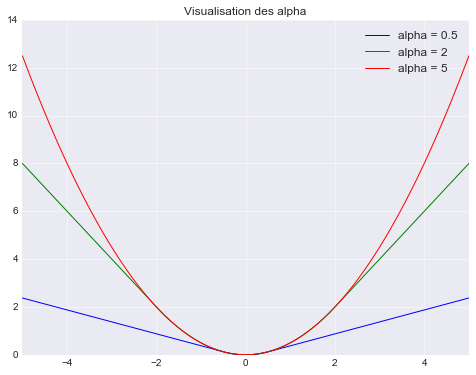

In [96]:
def ro_alpha(alpha, x_val):
    if abs(x_val) <= alpha:
        return x_val**2 /2.
    return (alpha*abs(x_val) - (alpha**2)/2.)

x = np.linspace(-5, 5, 1000)
print("Moyenne de nos x:", x.mean())
print("Minimum de nos x:", x.min())
print("Maximum de nos x:", x.max())

val_alpha_05 = [ro_alpha(.5, x_val) for x_val in x]
val_alpha_2 = [ro_alpha(2, x_val) for x_val in x]
val_alpha_5 = [ro_alpha(5, x_val) for x_val in x]

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(8, 6))
plt.plot(x, val_alpha_05)
plt.plot(x, val_alpha_2)
plt.plot(x, val_alpha_5)
plt.xlim([-5, 5])
plt.title("Visualisation des alpha")
plt.legend(["alpha = 0.5", "alpha = 2", "alpha = 5"])
plt.show()

<font> L'effet de alpha sur l'estimateur θ: </font>

## <u>Quetsion 2:</u> <i>Générer n = 100 vecteurs aléatoires</i> 

In [132]:
theta_zero = 1
x_1 = np.random.uniform(0, 1, 100)
x_2 = np.random.uniform(0, 1, 100)
X = np.matrix(np.transpose([x_1, x_2]))
theta = np.array([[1], [1], [1]])

y = theta[:,0] + np.dot(X, theta[1:]) + np.random.normal(0, 1, 1)

## <u>Quetsion 3:</u> <i>Pour α=2 calculer θα</i> 

In [135]:
def func_to_minimize(theta_chap, alpha):
    res = 0;
    for i in range(100):
        res += ro_alpha(alpha, (y[i] - theta[:, 0] - (np.dot(X[i, :], theta_chap[1:]))).sum())
    return res

alpha = 2
minimize(func_to_minimize, np.ones(3), method='nelder-mead', args=alpha, options={'xtol': 1e-5})

 final_simplex: (array([[ 2.23624289, -0.39463227, -0.0488141 ],
       [ 2.23624968, -0.39463406, -0.04881616],
       [ 2.23623442, -0.3946341 , -0.04881657],
       [ 2.23623952, -0.39462467, -0.0488212 ]]), array([ 124.95723502,  124.95723502,  124.95723502,  124.95723502]))
           fun: 124.95723501909603
       message: 'Optimization terminated successfully.'
          nfev: 154
           nit: 84
        status: 0
       success: True
             x: array([ 2.23624289, -0.39463227, -0.0488141 ])

## <u>Quetsion 4:</u> <i>Calculer un estimateur bootstrap θ*_chapα pour α=2</i> 

In [140]:
f = [ 2.23624289, -0.39463227, -0.0488141 ]

a=0
for i in range(100):
    a += ro_alpha(alpha, (y[i] - theta[:, 0] - (np.dot(X[i, :], f[1:]))).sum())

a

124.95723501909555